Join the data from Part 1 with the data from Part 2 to create a new dataframe.


In [2]:
import pandas as pd

# Opening both CSV's file as a DataFrame
df1 = pd.read_csv('../data/fsq_poi.csv')
df2 = pd.read_csv('../data/yelp_poi.csv')

# Joining the data (vertically)
joined_df = pd.concat([df1, df2])

joined_df


,station,usage,total_bikes,poi_name,poi_distance,poi_address
0,Benjamin Godard - Victor Hugo,0.914286,35,Square Lamartine,94.000000,"3 Square Lamartine, 75016 Paris"
1,Benjamin Godard - Victor Hugo,0.914286,35,Boulangerie Schou,122.000000,"96 rue de la Faisanderie (Rue Dufrénoy), 75016..."
2,Benjamin Godard - Victor Hugo,0.914286,35,Le Zinc du 16,246.000000,"58 rue de la Faisanderie, 75116 Paris"
3,Benjamin Godard - Victor Hugo,0.914286,35,Laboratoire Cohen Mme Vincent M.C,52.000000,"187 avenue Victor Hugo, 75116 Paris"
4,Benjamin Godard - Victor Hugo,0.914286,35,Tabac Lamartine,52.000000,"178 avenue Victor Hugo, 75116 Paris"
...,...,...,...,...,...,...
95,Toudouze - Clauzel,0.800000,20,Clasico Argentino,122.682395,22 rue Henry Monnier
96,Toudouze - Clauzel,0.800000,20,The Hardware Société,997.498508,10 rue Lamarck
97,Toudouze - Clauzel,0.800000,20,Sizin,176.359336,47 rue Saint-Georges
98,Toudouze - Clauzel,0.800000,20,Pi Hour,189.153410,32 rue de la Rochefoucauld


In [3]:
# I'm saving the dataframe to CSV for the next section
joined_df.to_csv('../data/joined.csv', index=False)


### Checking Data Types


In [4]:
joined_df.dtypes


station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

### Checking for null values


In [5]:
print(joined_df.isnull().sum())


station         0
usage           0
total_bikes     0
poi_name        0
poi_distance    0
poi_address     0
dtype: int64


### EDA


In [6]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


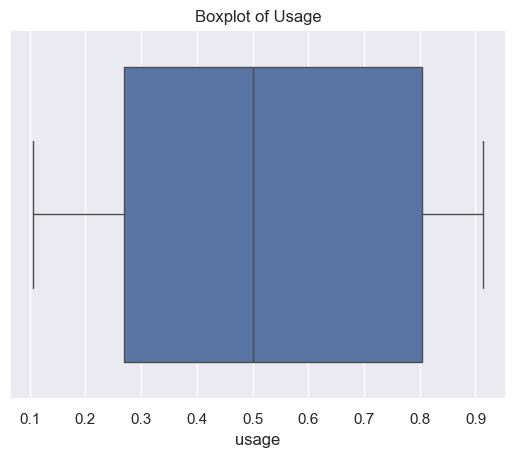

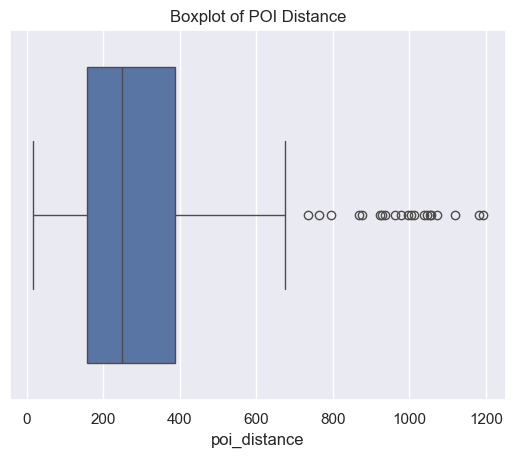

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'usage'
sns.boxplot(x=joined_df['usage'])
plt.title('Boxplot of Usage')
plt.show()

# Boxplot for 'poi_distance'
sns.boxplot(x=joined_df['poi_distance'])
plt.title('Boxplot of POI Distance')
plt.show()


Boxplot of Usage:
This boxplot provides a visual summary of the distribution of the 'usage' variable. The central box represents the middle 50% of the data (the interquartile range, or IQR), with the median indicated by the line within the box. The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively. Points beyond the whiskers may be considered outliers. In this plot, 'usage' seems to be fairly evenly distributed, with no obvious outliers. This suggests that the usage rate does not vary wildly and that most of the data points fall within a relatively narrow range.

Boxplot of POI Distance:
Similar to the first, this boxplot summarizes the distribution of 'poi_distance'. The distribution appears to be right-skewed, with several points lying beyond the upper whisker, which are potential outliers. This indicates that while most of the points of interest (POIs) are within a closer range, there are a few POIs that are much farther away compared to the rest.


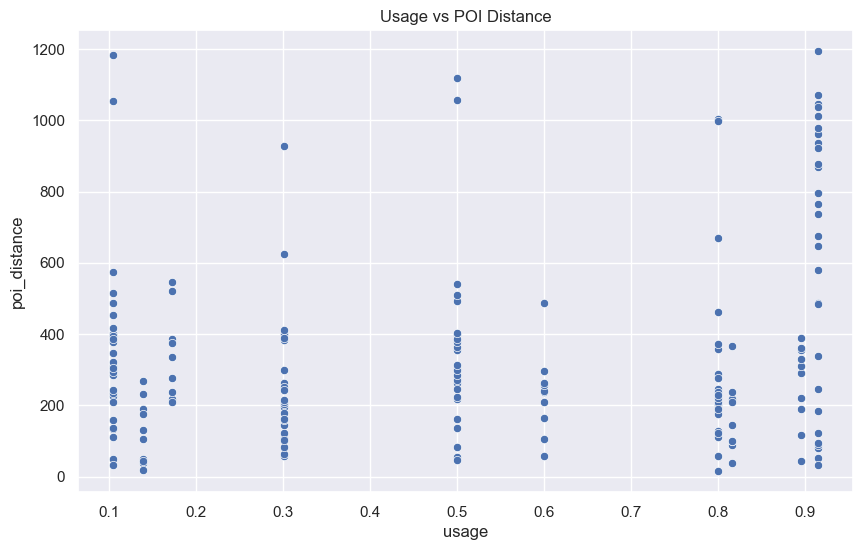

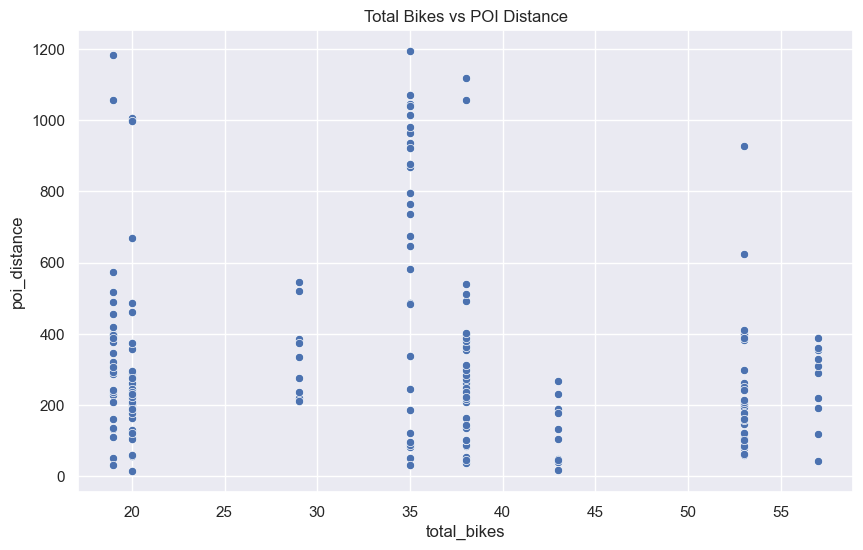

In [8]:
# Scatterplot for Usage vs POI Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='usage', y='poi_distance')
plt.title('Usage vs POI Distance')
plt.show()

# Scatterplot for Total Bikes vs POI Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='total_bikes', y='poi_distance')
plt.title('Total Bikes vs POI Distance')
plt.show()


Scatterplot of Usage vs POI Distance:
This scatterplot is looking for a relationship between 'usage' and 'poi_distance'. The plot does not indicate a clear or strong relationship between these two variables. The points are quite scattered, suggesting that the distance to points of interest does not have a straightforward or consistent impact on usage rates. There are clusters of data points across all levels of usage, irrespective of the POI distance.

Scatterplot of Total Bikes vs POI Distance:
This scatterplot explores the relationship between 'total_bikes' and 'poi_distance'. Similar to the previous scatterplot, there is no evident pattern that would suggest a strong relationship. The data points are dispersed across the plot, indicating that the number of total bikes does not consistently increase or decrease with the distance to points of interest.

### EDA results:

In summary, the boxplots provide a clear understanding of the distribution of individual variables, indicating that 'usage' has a more uniform distribution compared to 'poi_distance', which has more variance and potential outliers. The scatterplots aim to identify correlations between variables, but in this case, they suggest that there is no strong or linear correlation between 'usage' or 'total bikes' and the distance to points of interest. 


# Database


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)


In [8]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('../data/points_of_interest.db')

# Inspect the first few rows of fsq_poi
query_fsq = "SELECT * FROM fsq_poi LIMIT 5;"
df_fsq = pd.read_sql_query(query_fsq, conn)
print("First few rows of Foursquare data:\n", df_fsq)

# Inspect the first few rows of yelp_poi
query_yelp = "SELECT * FROM yelp_poi LIMIT 5;"
df_yelp = pd.read_sql_query(query_yelp, conn)
print("\nFirst few rows of Yelp data:\n", df_yelp)



First few rows of Foursquare data:
                          station     usage  total_bikes  \
0  Benjamin Godard - Victor Hugo  0.914286           35   
1  Benjamin Godard - Victor Hugo  0.914286           35   
2  Benjamin Godard - Victor Hugo  0.914286           35   
3  Benjamin Godard - Victor Hugo  0.914286           35   
4  Benjamin Godard - Victor Hugo  0.914286           35   

                            poi_name  poi_distance  \
0                   Square Lamartine            94   
1                  Boulangerie Schou           122   
2                      Le Zinc du 16           246   
3  Laboratoire Cohen Mme Vincent M.C            52   
4                    Tabac Lamartine            52   

                                         poi_address  
0                    3 Square Lamartine, 75016 Paris  
1  96 rue de la Faisanderie (Rue Dufrénoy), 75016...  
2              58 rue de la Faisanderie, 75116 Paris  
3                187 avenue Victor Hugo, 75116 Paris  
4        

Join

In [10]:
simple_query = """
SELECT fsq_poi.station, yelp_poi.station
FROM fsq_poi
INNER JOIN yelp_poi ON fsq_poi.station = yelp_poi.station;
"""

joined_df = pd.read_sql_query(simple_query, conn)
print(joined_df.head())



                         station                        station
0  Benjamin Godard - Victor Hugo  Benjamin Godard - Victor Hugo
1  Benjamin Godard - Victor Hugo  Benjamin Godard - Victor Hugo
2  Benjamin Godard - Victor Hugo  Benjamin Godard - Victor Hugo
3  Benjamin Godard - Victor Hugo  Benjamin Godard - Victor Hugo
4  Benjamin Godard - Victor Hugo  Benjamin Godard - Victor Hugo


Look at the data before and after the join to validate your data.


In [7]:
# SQL query to join the two tables
query = """
SELECT *
FROM fsq_poi
INNER JOIN yelp_poi
ON fsq_poi.station = yelp_poi.station;
"""

# Execute query and load into DataFrame
joined_df = pd.read_sql_query(query, conn)

# Retrieve the top 5 distinct stations
cursor = conn.cursor()
cursor.execute(
    "SELECT DISTINCT station FROM poi LIMIT 5")
rows = cursor.fetchall()
for row in rows:
    print(row)\

cursor.close()
conn.close()



('Benjamin Godard - Victor Hugo',)
('André Mazet - Saint-André des Arts',)
('Faubourg Du Temple - Republique',)
('Beaux-Arts - Bonaparte',)
('Toudouze - Clauzel',)
